C:\Users\nigiannopoulos\AppData\Local\Temp\ipykernel_6432\22575906.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')
C:\Users\nigiannopoulos\AppData\Local\Temp\ipykernel_6432\22575906.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')
C:\Users\nigiannopoulos\AppData\Local\Temp\ipykernel_6432\22575906.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')
C:\Users\nigiannopoulos\AppData\Local\Te

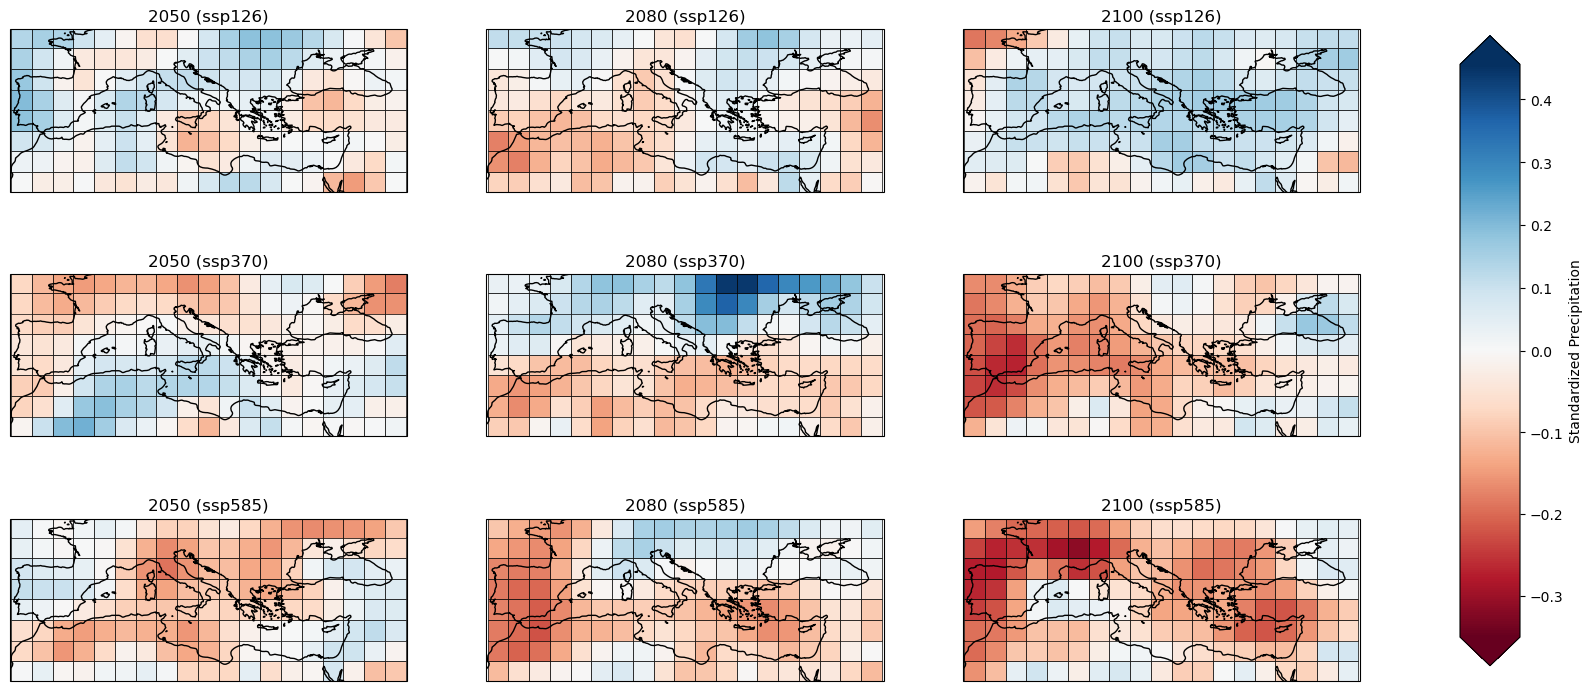

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize, TwoSlopeNorm
import matplotlib.cm as cm

# Define the base directory and scenarios
base_dir = 'Predictor'
scenarios = ['ssp126', 'ssp370', 'ssp585']
years = [2050, 2080, 2100]

# Initialize variables to store global min and max values
global_min, global_max = float('inf'), float('-inf')

# Update global_min and global_max based on all data
for scenario in scenarios:
    scenario_folders = [f for f in os.listdir(base_dir) if scenario in f]
    for folder in scenario_folders:
        folder_path = os.path.join(base_dir, folder)
        csv_file = f'{scenario}_yearly.csv'
        csv_path = os.path.join(folder_path, csv_file)
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            current_min = df['prcp_sd'].min()
            current_max = df['prcp_sd'].max()
            global_min = min(global_min, current_min)
            global_max = max(global_max, current_max)

# Function to plot map for a given year and scenario
def plot_map_for_year_scenario(ax, data, year, scenario, global_min, global_max):
    ax.coastlines()
    ax.set_extent([-10, 43.8, 28, 50], crs=ccrs.PlateCarree())  # Focus on the Mediterranean region
    norm = TwoSlopeNorm(vmin=global_min, vcenter=0, vmax=global_max)
    cmap = cm.get_cmap('RdBu')

    for index, row in data.iterrows():
        lon_center = row['Longitude']
        lat_center = row['Latitude']
        prcp_sd = row['prcp_sd']
        delta_lon = 2.8125 / 2
        delta_lat = 2.8125 / 2
        lower_left = [lon_center - delta_lon, lat_center - delta_lat]

        rect = mpatches.Rectangle(lower_left, 2.8125, 2.8125, transform=ccrs.PlateCarree(),
                                  facecolor=cmap(norm(prcp_sd)), linewidth=0.5, edgecolor='black')
        ax.add_patch(rect)

    ax.set_title(f'{year} ({scenario})')

# Create a figure with subplots arranged in a grid
fig, axs = plt.subplots(len(scenarios), len(years), figsize=(20, 9), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(right=0.8)

for i, scenario in enumerate(scenarios):
    for j, year in enumerate(years):
        all_data = []
        # Loop through each folder within the scenario
        scenario_folders = [f for f in os.listdir(base_dir) if scenario in f]
        for folder in scenario_folders:
            folder_path = os.path.join(base_dir, folder)
            csv_file = f'{scenario}_yearly.csv'
            csv_path = os.path.join(folder_path, csv_file)
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path)
                # Filter the DataFrame for the specified year
                year_data = df[df['year'] == year]
                if not year_data.empty:
                    all_data.append(year_data[['Longitude', 'Latitude', 'prcp_sd']])

        # Combine data from all folders
        combined_data = pd.concat(all_data, ignore_index=True)

        # Plot the map for the current scenario and year
        ax = axs[i, j] if len(scenarios) > 1 else axs[j]
        if not combined_data.empty:
            plot_map_for_year_scenario(ax, combined_data, year, scenario, global_min, global_max)

# Add a global colorbar
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])  # Adjust the position and size as needed
sm = cm.ScalarMappable(cmap='RdBu', norm=TwoSlopeNorm(vmin=global_min, vcenter=0, vmax=global_max))
sm._A = []
fig.colorbar(sm, cax=cbar_ax, label='Standardized Precipitation', extend='both')

plt.show()


C:\Users\nigiannopoulos\AppData\Local\Temp\ipykernel_6432\1958025674.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')
C:\Users\nigiannopoulos\AppData\Local\Temp\ipykernel_6432\1958025674.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')
C:\Users\nigiannopoulos\AppData\Local\Temp\ipykernel_6432\1958025674.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')
C:\Users\nigiannopoulos\AppData\Lo

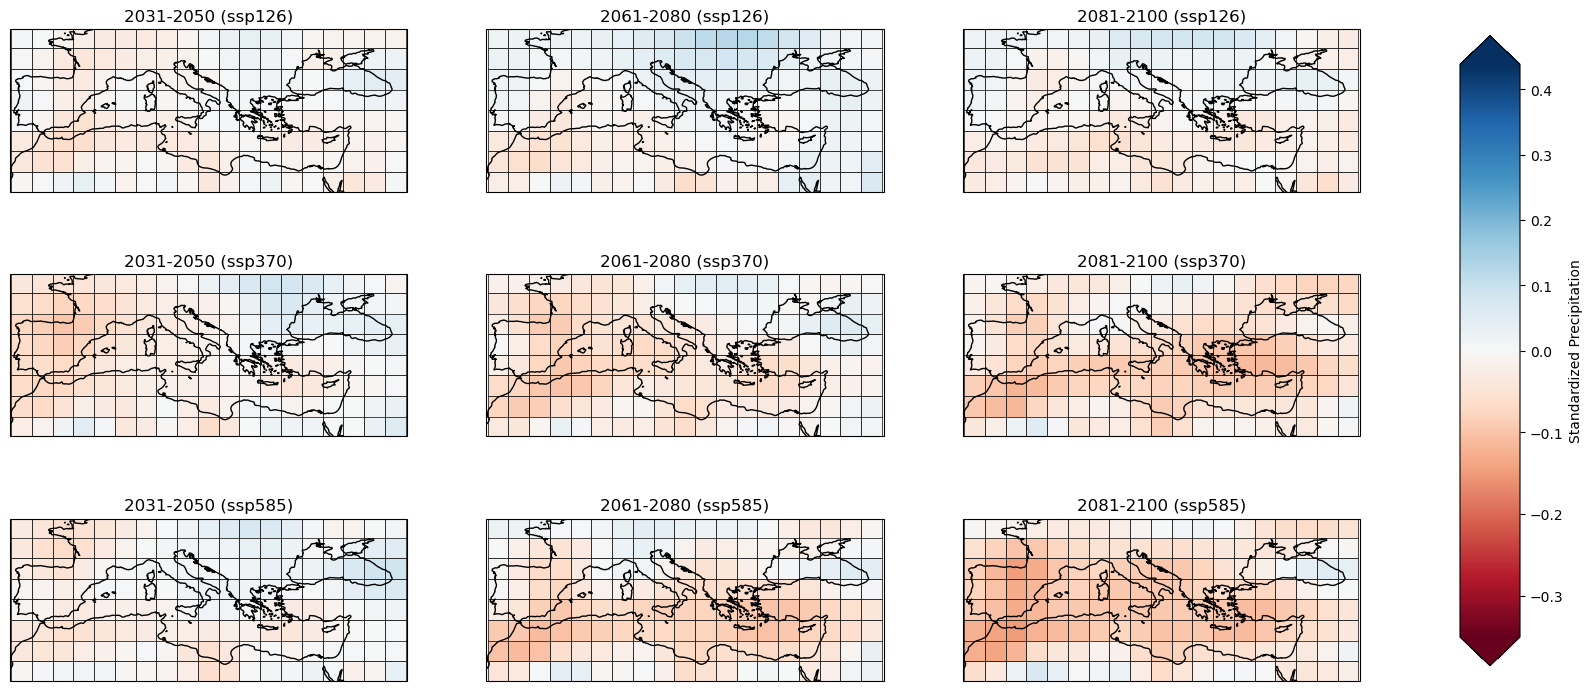

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize, TwoSlopeNorm
import matplotlib.cm as cm

# Define the base directory and scenarios
base_dir = 'Predictor'
scenarios = ['ssp126', 'ssp370', 'ssp585']
periods = {'2031-2050': (2031, 2050), '2061-2080': (2061, 2080), '2081-2100': (2081, 2100)}

# Initialize variables to store global min and max values
global_min, global_max = float('inf'), float('-inf')

# Update global_min and global_max based on all data within the specified periods
for scenario in scenarios:
    scenario_folders = [f for f in os.listdir(base_dir) if scenario in f]
    for folder in scenario_folders:
        folder_path = os.path.join(base_dir, folder)
        csv_file = f'{scenario}_yearly.csv'
        csv_path = os.path.join(folder_path, csv_file)
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            for period, (start_year, end_year) in periods.items():
                period_data = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
                current_min = period_data['prcp_sd'].min()
                current_max = period_data['prcp_sd'].max()
                global_min = min(global_min, current_min)
                global_max = max(global_max, current_max)

# Function to plot map for a given period and scenario
def plot_map_for_period_scenario(ax, data, period, scenario, global_min, global_max):
    ax.coastlines()
    ax.set_extent([-10, 43.8, 28, 50], crs=ccrs.PlateCarree())  # Focus on the Mediterranean region
    norm = TwoSlopeNorm(vmin=global_min, vcenter=0, vmax=global_max)
    cmap = cm.get_cmap('RdBu')

    for index, row in data.iterrows():
        lon_center = row['Longitude']
        lat_center = row['Latitude']
        prcp_sd = row['prcp_sd']
        delta_lon = 2.8125 / 2
        delta_lat = 2.8125 / 2
        lower_left = [lon_center - delta_lon, lat_center - delta_lat]

        rect = mpatches.Rectangle(lower_left, 2.8125, 2.8125, transform=ccrs.PlateCarree(),
                                  facecolor=cmap(norm(prcp_sd)), linewidth=0.5, edgecolor='black')
        ax.add_patch(rect)

    ax.set_title(f'{period} ({scenario})')

# Create a figure with subplots arranged in a grid
fig, axs = plt.subplots(len(scenarios), len(periods), figsize=(20, 9), subplot_kw={'projection': ccrs.PlateCarree()})
fig.subplots_adjust(right=0.8)

for i, scenario in enumerate(scenarios):
    for j, (period, (start_year, end_year)) in enumerate(periods.items()):
        all_data = []
        # Loop through each folder within the scenario
        scenario_folders = [f for f in os.listdir(base_dir) if scenario in f]
        for folder in scenario_folders:
            folder_path = os.path.join(base_dir, folder)
            csv_file = f'{scenario}_yearly.csv'
            csv_path = os.path.join(folder_path, csv_file)
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path)
                # Filter the DataFrame for the specified period
                period_data = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
                if not period_data.empty:
                    mean_period_data = period_data.groupby(['Longitude', 'Latitude']).mean().reset_index()
                    all_data.append(mean_period_data[['Longitude', 'Latitude', 'prcp_sd']])

        # Combine data from all folders
        combined_data = pd.concat(all_data, ignore_index=True)

        # Plot the map for the current scenario and period
        ax = axs[i, j] if len(scenarios) > 1 else axs[j]
        if not combined_data.empty:
            plot_map_for_period_scenario(ax, combined_data, period, scenario, global_min, global_max)

# Add a global colorbar
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])  # Adjust the position and size as needed
sm = cm.ScalarMappable(cmap='RdBu', norm=TwoSlopeNorm(vmin=global_min, vcenter=0, vmax=global_max))
sm._A = []
fig.colorbar(sm, cax=cbar_ax, label='Standardized Precipitation', extend='both')

plt.show()
